# Topic modeling with LDA

Tried using LDA to obtained meaningful clusters of headlines but the results were not satisfactory so decided to go with BERTopic(implemented in next file). The following is the process for LDA implementation.

In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [53]:
df = pd.read_csv('Dataset_10k.csv')

/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [54]:
df = df[['title']]

/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [55]:
df.isna().sum()

/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,0
title,0


In [58]:
# TEXT PREPROCESSING
def preprocess(text):
    tokens = word_tokenize(text.lower())
    filtered_tokens = [token for token in tokens if token not in stopwords.words('english')]
    lemmatizer = WordNetLemmatizer()
    lemmatized_tokens = [lemmatizer.lemmatize(token) for token in filtered_tokens]
    processed_text = ' '.join(lemmatized_tokens)
    return processed_text

df['title'] = df['title'].apply(preprocess)
def preprocess1(text):
    # Convert text to lowercase
    text = text.lower()
    tokens = nltk.word_tokenize(text)
    #df['title3'] = df['title1'].apply(lambda x: re.sub(r'(?i)\s*artificial\s+intelligence\s*', ' ai ', x))   #
    #df['title5'] = df['title'].apply(lambda x: re.sub(r'A\.I\.*', ' ai ', x))
    #df['title3'] = df['title3'].apply(lambda x: x.strip())
    token1 = [re.sub(r'[^a-z]',' ', token) for token in tokens]
    token1 = [token for token in token1 if token]
    text = ' '.join(token1)
    return text
df['title1']=df['title'].apply(preprocess1)
stop_words = set(stopwords.words('english'))
def remove_stop_words(text,stop_words):
    tl = text.split()
    l=[]
    for word in tl:
        if word not in stop_words:
            l.append(word)
    text = ' '.join(l)
    return text
df['title1']=df['title1'].apply(lambda x: remove_stop_words(x,stop_words))
# changing artificial intelligence to ai
df['title3'] = df['title1'].apply(lambda x: re.sub(r'(?i)\s*artificial\s+intelligence\s*', ' ai ', x))
df['title3'] = df['title3'].apply(lambda x: x.strip())
# removing consecutive ai terms
df['title4']=df['title3'].apply(lambda x:  re.sub(r'(ai\s+)+', 'ai ', x))
df['title4'] = df['title4'].apply(lambda x: x.strip())

/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [89]:
df['tokens']=df['title4'].apply(lambda x: x.split())

/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [90]:
df['tokens']

/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,tokens
0,"[fyilicia, ai, revolution, inclusivity, voice,..."
1,"[intel, launch, world, first, system, foundry,..."
2,"[unique, challenge, selling, enterprise, ai]"
3,"[contentious, california, ai, bill, pas, legis..."
4,"[exploring, genius, creation, humanity, age, ai]"
...,...
9995,"[eu, parliament, approves, landmark, ai, act]"
9996,"[new, study, uk, avoid, eu, style, ai, regulat..."
9997,"[mckinsey, google, cloud, help, company, tap, ..."
9998,"[ai, could, keep, young, worker, getting, skil..."


In [41]:
from gensim import corpora
from gensim.models import Phrases
from gensim import models

In [91]:
tokens = df['tokens'].tolist()
bigram_model = Phrases(tokens)
trigram_model = Phrases(bigram_model[tokens], min_count=1)
tokens = list(trigram_model[bigram_model[tokens]])

/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [63]:
tokens

/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[['fyilicia',
  'ai',
  'revolution',
  'inclusivity',
  'voice',
  'uk',
  'tech',
  'science',
  'daily',
  'podcast'],
 ['intel', 'launch_world_first', 'system', 'foundry', 'designed', 'ai', 'era'],
 ['unique_challenge', 'selling', 'enterprise', 'ai'],
 ['contentious',
  'california',
  'ai',
  'bill',
  'pas',
  'legislature',
  'awaits',
  'governor',
  'signature'],
 ['exploring', 'genius', 'creation', 'humanity', 'age', 'ai'],
 ['conversational',
  'ai',
  'improves',
  'fourth',
  'trimester',
  'maternal',
  'care',
  'penn',
  'medicine'],
 ['disney', 'harness', 'ai', 'drive', 'streaming', 'ad', 'technology'],
 ['rinehart', 'unpacking', 'executive_order', 'ai'],
 ['video', 'bitcoin', 'ai', 'meet'],
 ['nvidia',
  'relentless',
  'rally',
  'ai',
  'chip_giant',
  'eye',
  'new',
  'heights'],
 ['new',
  'report',
  'expects',
  'australia',
  'ai',
  'economy',
  'generate',
  'billion'],
 ['ai',
  'doomers',
  'e',
  'accs',
  'sb',
  'ai',
  'law',
  'california',
  'shaping

In [92]:
dictionary_LDA = corpora.Dictionary(tokens)
dictionary_LDA.filter_extremes(no_below=5)
corpus = [dictionary_LDA.doc2bow(tok) for tok in tokens]

/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [100]:
np.random.seed(123456)
num_topics = 10
%time lda_model = models.LdaModel(corpus, num_topics=num_topics, \
                                  id2word=dictionary_LDA, \
                                  passes=4, alpha=[0.01]*num_topics, \
                                  eta=[0.01]*len(dictionary_LDA.keys()))

/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


CPU times: user 7.31 s, sys: 91.2 ms, total: 7.4 s
Wall time: 8.48 s


In [101]:
for i,topic in lda_model.show_topics(formatted=True, num_topics=num_topics, num_words=20):
    print(str(i)+": "+ topic)
    print()

0: 0.030*"u" + 0.028*"eu" + 0.026*"new" + 0.022*"act" + 0.019*"use" + 0.019*"school" + 0.016*"state" + 0.016*"news" + 0.015*"opinion" + 0.014*"uk" + 0.013*"regulation" + 0.012*"china" + 0.012*"rule" + 0.011*"design" + 0.011*"medical" + 0.010*"transforming" + 0.010*"student" + 0.010*"guide" + 0.010*"model" + 0.009*"risk"

1: 0.034*"google" + 0.028*"launch" + 0.027*"new" + 0.022*"make" + 0.019*"tool" + 0.019*"data" + 0.017*"generative" + 0.015*"first" + 0.014*"chatbot" + 0.014*"platform" + 0.014*"model" + 0.012*"system" + 0.012*"using" + 0.011*"use" + 0.011*"improve" + 0.011*"aws" + 0.010*"microsoft" + 0.010*"learning" + 0.010*"latest" + 0.010*"unveils"

2: 0.020*"revolution" + 0.018*"plan" + 0.018*"new" + 0.018*"tech" + 0.015*"strategy" + 0.015*"get" + 0.014*"technology" + 0.014*"future" + 0.014*"world" + 0.013*"agent" + 0.012*"want" + 0.011*"google" + 0.011*"health" + 0.010*"helping" + 0.009*"building" + 0.008*"control" + 0.008*"ready" + 0.008*"startup" + 0.008*"raise" + 0.008*"center"

/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [69]:
df.shape

/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


(10000, 5)

In [70]:
len(df)

/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


10000

In [102]:
topics = [lda_model[corpus[i]] for i in range(len(df))]

/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [103]:
def topics_document_to_dataframe(topics_document, num_topics):
    res = pd.DataFrame(columns=range(num_topics))
    for topic_weight in topics_document:
        res.loc[0, topic_weight[0]] = topic_weight[1]
    return res

/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [104]:
# Like TF-IDF, create a matrix of topic weighting, with documents as rows and topics as columns
document_topic = \
pd.concat([topics_document_to_dataframe(topics_document, num_topics=num_topics) for topics_document in topics]) \
  .reset_index(drop=True).fillna(0)

/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-104-ce1083c907df>:4: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  .reset_index(drop=True).fillna(0)


/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<Axes: >

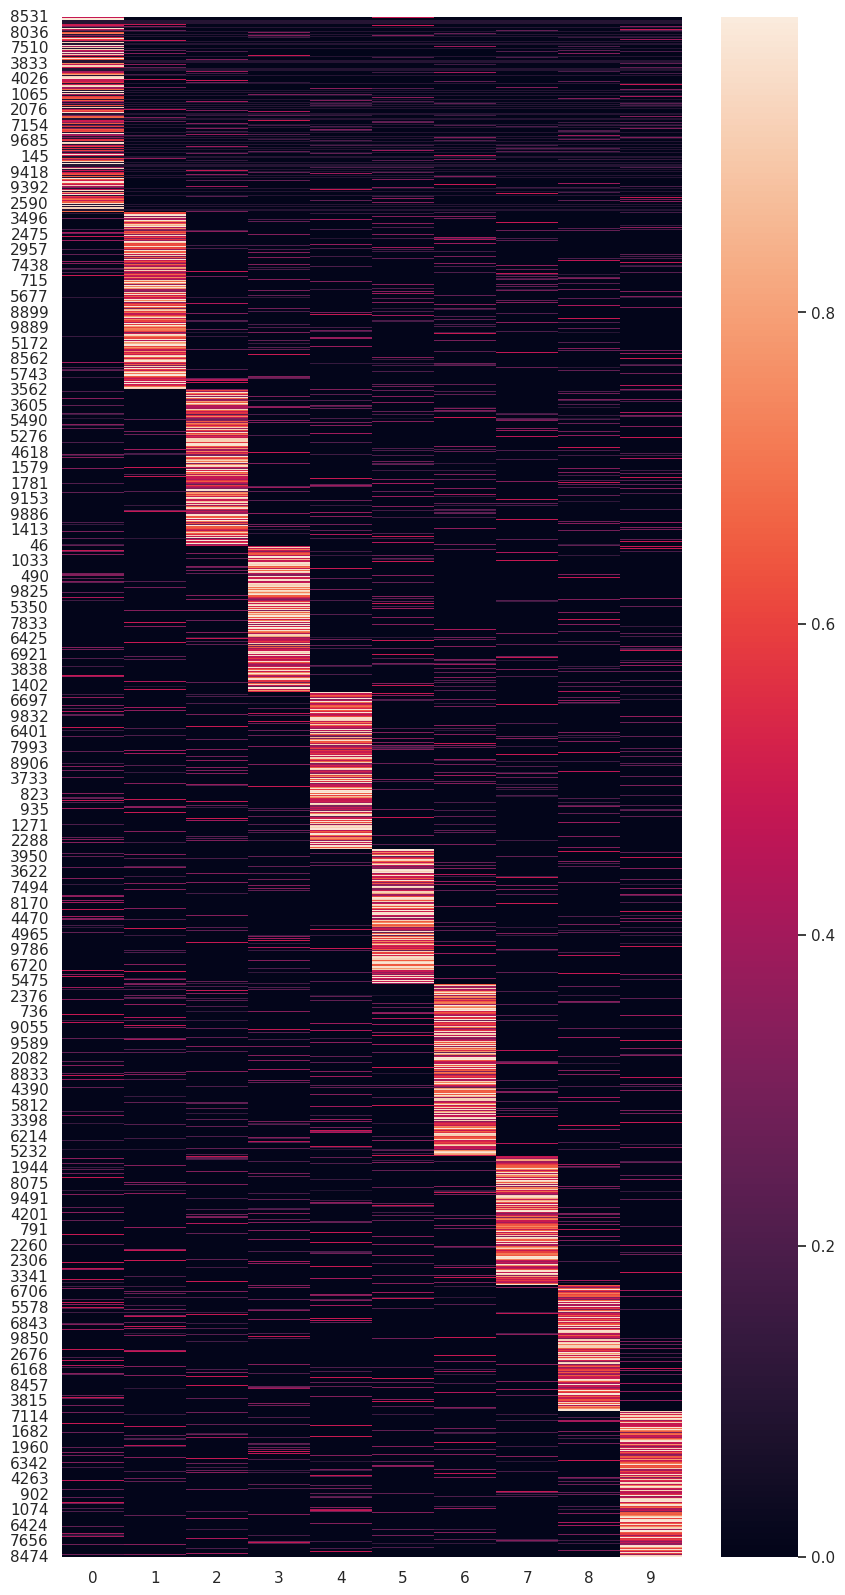

In [105]:
%matplotlib inline
import seaborn as sns; sns.set(rc={'figure.figsize':(10,20)})
sns.heatmap(document_topic.loc[document_topic.idxmax(axis=1).sort_values().index])

In [106]:
%matplotlib inline
import pyLDAvis
import pyLDAvis.gensim
vis = pyLDAvis.gensim.prepare(topic_model=lda_model, corpus=corpus, dictionary=dictionary_LDA)
pyLDAvis.enable_notebook()
pyLDAvis.display(vis)

/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
